# TA Review - Feb 5th, 2024

**Younghun Lee**

---

# Homework 5

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

# 1. Forward Rates

Use the data set `famabliss_strips_2023-12-29.xlsx`.

It gives prices on **zero coupon bonds** with maturities of 1 through 5 years.
* These are prices per \$1 face value on bonds that only pay principal.
* Such bonds can be created from treasuries by *stripping* out their coupons.
* In essence, you can consider these prices as the discount factors $Z$, for maturity intervals 1 through 5 years.

In this problem, we focus on six dates: the month of December in 2018 through 2023.

In [2]:
filepath = '../data/famabliss_strips_2023-12-29.xlsx'
prices = pd.read_excel(filepath, sheet_name='prices')
prices.set_index('date',inplace=True)
prices.columns = prices.columns.astype(int)
prices /= 100

Define the **forward discount factor** as

$\begin{align}
F(t,T_1,T_2) = \frac{Z(t,T_2)}{Z(t,T_1)}
\end{align}$

Given this definition, answer the following:
- For $T_2=T_1$, what is $F(t,T_1,T_2) = 1$
- Is $F(t,T_1,T_2)$ increasing or decreasing in $T_2$? Increasing
- What is $F(t,t,T)$? $= Z(t, T)$

**Q:** For each of the six dates, (Dec 2018, Dec 2019, ...), calculate the forward discount factor, $F(t,T_1,T_2)$, where $T_2 = T_1 + 1$ for $1\le T_1\le 4$. Make a plot of the curve $F$ at each of these six dates.

Since the given prices are zero coupon bonds on \$1 face value,
$$Price(T_1) = 1 * Z(t, T_1)$$

Thus, 
$$F(t, T_1, T_2) = \frac{Price(T_2)}{Price(T_1)}$$

In [3]:
px = prices.loc['2018-12-01'::12]
px.index = px.index.year
F = px[[2,3,4,5]] / px[[1,2,3,4]].values
F

,2,3,4,5
date,,,,
2018,0.977060,0.976226,0.974684,0.974351
2019,0.984299,0.983514,0.981894,0.982046
2020,0.998560,0.997773,0.994129,0.991997
2021,0.989286,0.985541,0.983136,0.983031
2022,0.959768,0.964111,0.963434,0.963870
2023,0.964203,0.966159,0.964153,0.965059


The forward rates is moving over in the interim.

<Axes: >

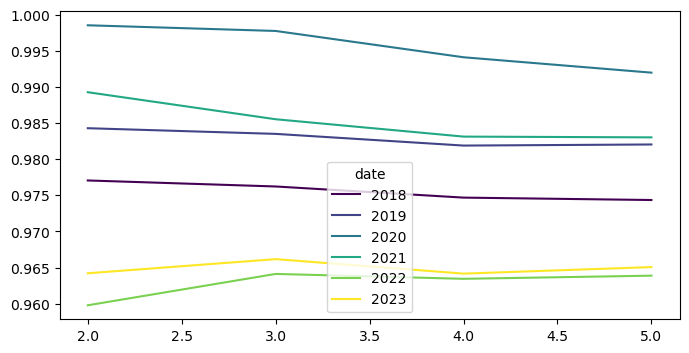

In [4]:
F.T.plot(figsize = (8, 4), cmap = 'viridis')

Assuming continous compounding, the forward discount factor is formulated as

$$F(t,T_1,T_2) = e^{-f(t,T_1,T_2)(T_2-T_1)}$$

In other words, the **forward discount rate** is given as

$$f = -\frac{1}{\tau} \ln F(t, T_1, T_2),\quad \text{where}\quad \tau = T_2 - T_1$$


**Q:** Use $F$ above to calculate the continuously compounded forward rates, $f$, at the six dates.

Make a plot of the curve, $f$, at each of these six dates.



In [5]:
f = -np.log(F)
spots = -np.log(px)/px.columns
f.insert(0,1,spots[1])
f

,1,2,3,4,5
date,,,,,
2018,0.026026,0.023207,0.024061,0.025642,0.025984
2019,0.015729,0.015825,0.016624,0.018272,0.018117
2020,0.001042,0.001441,0.002229,0.005889,0.008035
2021,0.003834,0.010772,0.014564,0.017008,0.017115
2022,0.046425,0.041064,0.036548,0.037252,0.036799
2023,0.047314,0.036454,0.034427,0.036505,0.035566


<Axes: >

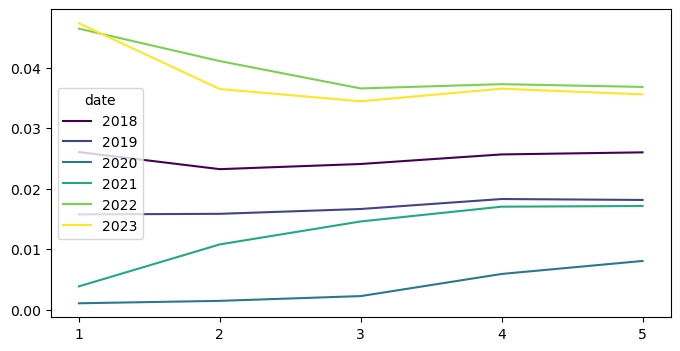

In [6]:
f.T.plot(xticks=f.columns, cmap = 'viridis', figsize = (8, 4))

Calculating spot rates from zero coupon bonds:

$$Price(T) = Z(t,T) = e^{-r(t,T)T}$$
As such, 
$$r(t,T) = -\frac{1}{T}\ln Z(t,T) = -\frac{\ln Price(T)}{T}$$


**Q:** Calculate the continuously compounded spot rates, $r$, at the six dates.

Plot both the forward curve and the spot curve on the date of Dec 2018.

Recall that $f(t,t,t+1) = r(t,t+1)$.

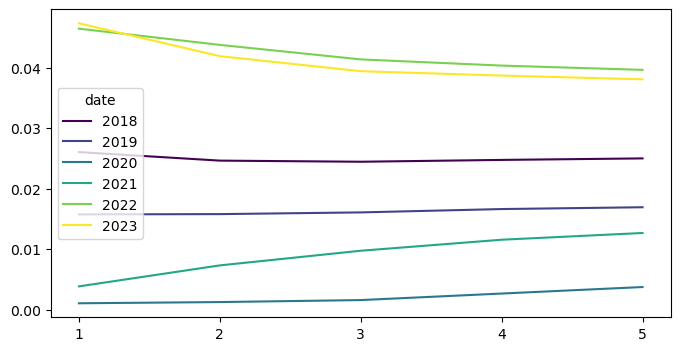

In [7]:
spots.T.plot(xticks=spots.columns, cmap = 'viridis', figsize = (8, 4));



Forward rate and Spot rate: **Converting to the Spot Rate**
$\begin{align}
r(0,T_n) = \frac{1}{T_n}\sum_{i=1}^nf(0,T_{i-1},T_i)\Delta
\end{align}$

where 
* $T_0=0$, 
* $f(0,0,T_1) = r(0,T_1)$.


As the spot rate is the average of the forward rates, the spot curve is upward sloping if the forward curve is higher than the spot rate, and vice versa. They cross at the minimum of the spot rate.

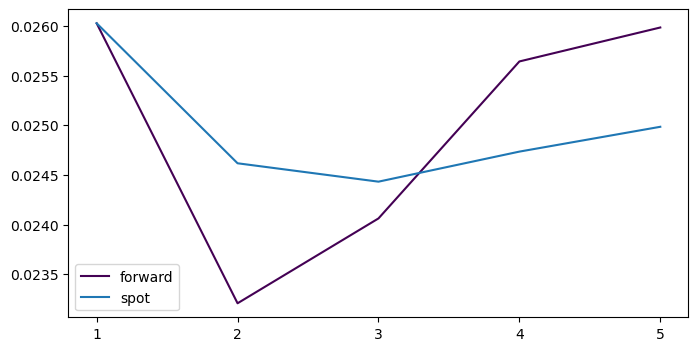

In [8]:
DATE = 2018
ax = f.loc[DATE].T.plot(xticks=f.columns, cmap = 'viridis', figsize = (8, 4))
spots.loc[DATE].T.plot(ax=ax)
ax.legend(['forward','spot']);

The **forward curve** holds constant $t$ and the interval $\Delta = T_2-T_1$ while varying $T_1$. 

$\begin{align}
f(t,T_1,T_1+\Delta)
\end{align}$

when holding the interval between $T_1$ and $T_2$ constant at $\Delta$, it is common to denote $T$ instead of $T_1$:

$\begin{align}
f(t,T,T+\Delta)
\end{align}$

**Q:** Plot the forward curve on Dec 2018 against the time-series evolution of $r(t,t+1)$ for dates $t$ between Dec 2018 and Dec 2022.

How does the evolution of one-year rates between 2018-2022 compare to the forward rates of 2018?

In [9]:
temp = f.loc[[DATE]].T

temp.columns.name = f'{DATE}: (n-1) to n'
temp.columns = [f'forward curve']
if DATE == 2018:
    temp['spot over time'] = spots[1].values[:-1]
elif DATE == 2019:
    temp['spot over time'] = spots[1].values[1:]

temp

,forward curve,spot over time
1,0.026026,0.026026
2,0.023207,0.015729
3,0.024061,0.001042
4,0.025642,0.003834
5,0.025984,0.046425


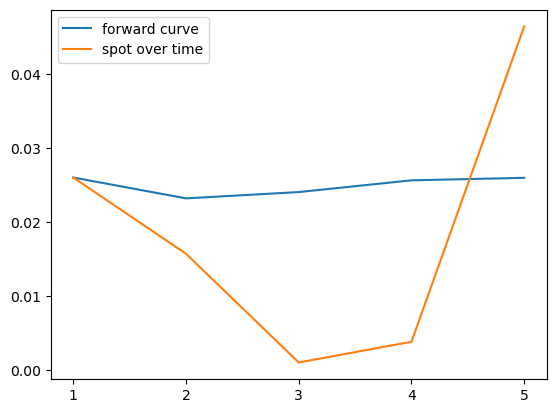

In [10]:
ax = temp.plot(xticks=temp.index)

***

# 2. Carry Trade

Suppose it is December 2018, and you determine to implement a carry trade with the following specification...

* Long \$100 million (market value, not face value) of the 5-year zero-coupon bond (maturing Dec 2023.)
* Short \$100 million (market value, not face value) of the 1-year zero-coupon bond (maturing Dec 2019.)
* Assume there is a 2% haircut on each side of the trade, so it requires \$4 million of investor capital to initiate it.

In [11]:
HAIRCUT = .02
INIT_SIZE = 1e8
FACE = 1e6 # Arbitray setup to scale the position e.g.) long position = 100 million / 1 million = 100

DATE = 2018
DATE1 = 2019

#### Setups:
- **Timing**: We continue to examine just the six dates above.
- **Bonds and cash**: Add a column for the `cash` position, to account for the one-year bill maturing and needing to be rolled over.
- **Face Value**: There is no mention of how large the face value is on each bond. Obviously this choice will not do anything more than scale the number of contracts in the trade. Below, we proceed with a face value of \\$1 million. This will simply scale the `positions` and `p` dataframes.

In [13]:
px

,1,2,3,4,5
date,,,,,
2018,0.974310,0.951959,0.929327,0.905801,0.882568
2019,0.984394,0.968938,0.952964,0.935710,0.918910
2020,0.998959,0.997520,0.995299,0.989455,0.981537
2021,0.996173,0.985500,0.971251,0.954872,0.938668
2022,0.954636,0.916229,0.883347,0.851046,0.820298
2023,0.953787,0.919644,0.888523,0.856672,0.826740


In [12]:
p = px.copy()
p.insert(0,'cash',1)
p *= FACE
p

,cash,1,2,3,4,5
date,,,,,,
2018,1000000.0,974309.532895,951959.168312,929327.251835,905800.507233,882567.551515
2019,1000000.0,984394.165182,968938.376101,952964.065833,935709.725930,918909.719373
2020,1000000.0,998958.637189,997519.894624,995298.575603,989454.755492,981536.529984
2021,1000000.0,996173.216548,985500.005990,971250.818410,954871.942575,938668.393461
2022,1000000.0,954636.124237,916228.997278,883346.761620,851045.910343,820297.854308
2023,1000000.0,953787.493113,919644.487972,888522.946446,856672.286172,826739.628824



#### Short position
* Each year you will roll over the short position to maintain a short \$100 million (market value) in the 1-year bond.
* This will require injecting more cash into the trade, as the expiring short will require more than \$100 million to close out. 
* In Dec 2022, no need to open a new short position, as your long position will (at that point) be a one-year bond.

#### Alternatives
The scheme above is for simplicity. You could try more interesting ways of setting the short position...
* Open a new short position sized to whatever is needed to cover the expiring short position.
* Set the short positions to duration-hedge the long position.

**Q:** Calculate the total profit and loss year-by-year.


- **Aging**: Recall that a 5-year bond becomes a 4 year bond, etc.
- **Rollover**: At each year, you must close the old short position and enter a new short position on the one-year note. 

In [72]:
value = pd.DataFrame(dtype=float, columns=p.columns, index=p.index)
pnl = pd.DataFrame(dtype=float, columns=p.columns, index=p.index)

pnl.loc[DATE] = 0
# First column is cash. Second column indicates the short position in the first 1-year bond.
# INIT_SIZE at the last column indicate the long position in the 5-year bond.
value.loc[DATE] = np.array([0,-INIT_SIZE,0,0,0,INIT_SIZE])
positions = value / p # calculates amount of bonds to buy/sell

dt_end = p.index[-1]

for i, dt in enumerate(p.index[1:]):
    # `i` will have lagged index on dt as `enumerate` starts 
    # from 0 while we are looping index on p from 1
    dt_lag = p.index[i]

    # Brings previous year's positions and shift it one year forward to reflect the passage of time
        # be careful that position.loc[dt_lag] is pd.Series, so shifting it will shift the value column-wise
    # first column (cash) will indicate the cash required to exit the previous 1-year bond position
    positions.loc[dt] = positions.loc[dt_lag].shift(-1) 
    # renew the position on 5-year bond as it became 4-year bond, and so on
    positions.loc[dt,5] = 0
    # display(positions)
    
    # roll over the short position
    if dt != dt_end:
        # enter into new short position
        positions.loc[dt,1] += -INIT_SIZE / p.loc[dt,1]
        # receive the cash for the short position
        positions.loc[dt,'cash'] += INIT_SIZE / p.loc[dt,'cash']

    # value of the new portfolio is the product of positions and prices
    value.loc[dt] = positions.loc[dt] * p.loc[dt]
    
    # pnl change for each bond
    pnl.loc[dt] = value.loc[dt] - value.loc[dt_lag]
    # cash required to close out the maturing short position
    pnl.loc[dt,'cash'] = value.loc[dt,'cash']
    
pnl.insert(0,'net',pnl.sum(axis=1))
pnl.loc['cumulative','net'] = pnl['net'].sum()

In [57]:
positions.replace(0,np.nan,inplace=True)
positions.style.format('{:,.5}',na_rep='')

,cash,1,2,3,4,5
date,,,,,,
2018,,-102.64,,,,113.31
2019,-2.6368,-101.59,,,113.31,
2020,-1.5853,-100.1,,113.31,,
2021,-0.10424,-100.38,113.31,,,
2022,-0.38415,8.5538,,,,
2023,8.5538,,,,,


In [60]:
value.replace(0,np.nan,inplace=True)
value.style.format('${:,.2f}',na_rep='')

,cash,1,2,3,4,5
date,,,,,,
2018,,"$-100,000,000.00",,,,"$100,000,000.00"
2019,"$-2,636,787.00","$-100,000,000.00",,,"$106,021,315.23",
2020,"$-1,585,323.78","$-100,000,000.00",,"$112,773,076.00",,
2021,"$-104,244.84","$-100,000,000.00","$111,662,841.48",,,
2022,"$-384,148.40","$8,165,785.45",,,,
2023,"$8,553,819.87",,,,,


In [61]:
pnl.replace(0,np.nan,inplace=True)
pnl.style.format('${:,.2f}',na_rep='')

,net,cash,1,2,3,4,5
date,,,,,,,
2018,,,,,,,
2019,"$3,384,528.23","$-2,636,787.00",,,,"$106,021,315.23","$-100,000,000.00"
2020,"$5,166,436.98","$-1,585,323.78",,,"$112,773,076.00","$-106,021,315.23",
2021,"$-1,214,479.36","$-104,244.84",,"$111,662,841.48","$-112,773,076.00",,
2022,"$-3,881,204.42","$-384,148.40","$108,165,785.45","$-111,662,841.48",,,
2023,"$388,034.42","$8,553,819.87","$-8,165,785.45",,,,
cumulative,"$3,843,315.85",,,,,,


**Q:** Calculate the total return (Dec 2023) on the initial \$4 million of investor capital.

#### Returns

In [121]:
capital = HAIRCUT * INIT_SIZE * 2

rets = pnl[['net']].drop('cumulative').rename(columns={'net':'pnl'})
rets['cumulative pnl'] = rets['pnl'].cumsum()
rets['cumulative ret (on initial capital)'] = (rets['cumulative pnl'])/capital
rets

,pnl,cumulative pnl,cumulative ret (on initial capital)
date,,,
2018,0.000000e+00,0.000000e+00,0.000000
2019,3.384528e+06,3.384528e+06,0.846132
2020,5.166437e+06,8.550965e+06,2.137741
2021,-1.214479e+06,7.336486e+06,1.834121
2022,-3.881204e+06,3.455281e+06,0.863820
2023,3.880344e+05,3.843316e+06,0.960829


<Axes: xlabel='date'>

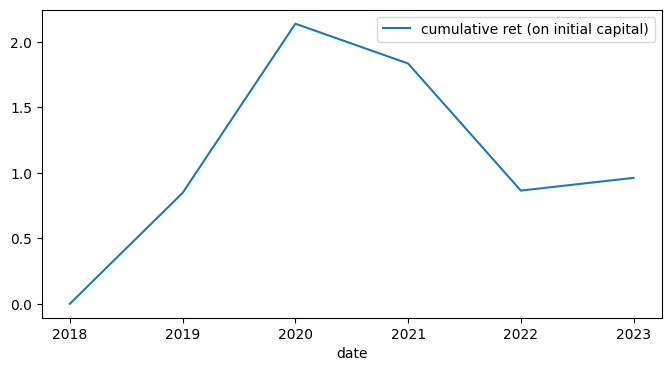

In [122]:
rets.iloc[:,-1:].plot(figsize = (8, 4))

**Attribution**

The profit of this trade is about falling interest rates in 2018-2020. The initial term spread is slightly negative, yet the profits are positive early due to the duration exposure and subsequent drop in rates. 

In the final few years, rates go up, and the term spread inverts, both of which cause losses to the investor.

In [80]:
spots

,1,2,3,4,5
date,,,,,
2018,0.026026,0.024617,0.024431,0.024734,0.024984
2019,0.015729,0.015777,0.016059,0.016612,0.016913
2020,0.001042,0.001242,0.001571,0.002650,0.003727
2021,0.003834,0.007303,0.009724,0.011545,0.012659
2022,0.046425,0.043744,0.041346,0.040322,0.039618
2023,0.047314,0.041884,0.039398,0.038675,0.038053


**Q:** How would this trade play out if the path of one-year spot rates equaled the forward rates observed in 2018?

In this scenario, the trade wouldn't be profitable: the return to holding the 5-year bond would equal the return to holding the one-year bond and rolling it over five years.

**Q:** Given Fact 3 of the *dynamic* (conditional) tests of EH in notebook W.5., do you expect that as of Dec 2023 the long-short trade above looks more or less favorable for Dec 2023-2028 than it did for Dec 2018-2023?

This is a question as to whether the forward-spot spread is bigger in 2018 or 2023. In W.5., we learned (in Dynamic Fact 3) that in times of higher forward-spot spreads, the expected excess return and realized yields are larger.

The table below shows that the forward-spot spread on 5-year bonds was `10bps` in 2018 and `-25bps` in 2023. Thus, we expect that the return to this trade (long 5-year bond, short 1-year bond) will be substantially worse in 2023-2028.

In [81]:
(f-spots).style.format('{:.2%}')

2018: (n-1) to n,1,2,3,4,5
date,,,,,
2018,0.00%,-0.14%,-0.04%,0.09%,0.10%
2019,0.00%,0.00%,0.06%,0.17%,0.12%
2020,0.00%,0.02%,0.07%,0.32%,0.43%
2021,0.00%,0.35%,0.48%,0.55%,0.45%
2022,0.00%,-0.27%,-0.48%,-0.31%,-0.28%
2023,0.00%,-0.54%,-0.50%,-0.22%,-0.25%


# Lecture Review

### FRA (Forward Rate Agreement)

- Agreement on lock in the rate in the future by paying the floating rate to counterparty.

$$\begin{align*}
& \quad N \Delta\left[f_n(0,T_1,T_2)-r_n(T_1,T_2)\right]\\[6pt]
\Delta \equiv & \quad T_2-T_1\\[6pt]
N \equiv & \quad \text{Notional Investment}
\end{align*}$$
- No-arbitrage replication

### Forward Contracts
- Agreement to buy a bond with maturity $T$ 
  - at a specific time in the future, $T_0$
  - at a specific price, $P_{\text{Fwd}}(t,T_0,T)$
- Prive vs Value
  - Price of the forward contract is set as the value is 0 at initialization.
  - Value will move with interest rates (initially 0)
  - Final payoff: $V_{\text{Fwd}}(T_0,T) = P(T_0,T) - P_{\text{Fwd}}(0,T_0,T)$
  - Interim value at time $t$: $V_{\text{Fwd}}(t,T_0,T) = Z(t,T_0)\left[P_{\text{Fwd}}(t,T_0,T) - P_{\text{Fwd}}(0,T_0,T)\right]$

Forward rate is very important since, 
  - forward loan: traded in the market
  - forward rate agreement: one time swap, how to hedge the risk? 

### Term Premium

- **Term Spread**: long term yield - short term yield

- **Term premium**: the risk premium of holding long term bond as holding bond for long term is risky.

  - A risk premium investors demand for taking on **interest rate risk**
  - is a measure of protection against unforeseen risks 
    - such as inflation and supply-demand shocks, encapsulating everything apart from expectations for the path of near-term interest rates.
  - The decreasing term premium could be the reason of negative term structure, rather than actual decrease in short rates
    - Why term premium decreasing? If the market is strong.
  - Term premium is hard to define?
    - It is what investors might expect in the future, which is hard to estimate without model.

$\renewcommand{\logyield}{y}$
$\renewcommand{\mat}{(n)}$

### Expectation Hypothesis
  
#### 1. The $n$-period yield is the average of expected one-period yields.
  - e.g.) today's 10years yield is the average of next 10 1-year yields. 
  - It's market expectation of rates. So there is no risk premium comes in.

  $$\begin{align*}
  \logyield^{\mat}_t = \frac{1}{n}\mathbb{E}_t\left[\logyield^{(1)}_t + \logyield^{(1)}_{t+1} + \logyield^{(1)}_{t+2} + \ldots + \logyield^{(1)}_{t+n-1}\right]
  \end{align*}$$

  - Empirical Analysis: Long-term yields are higher than short-term yields--even averaged over long periods of time.
  - Dynamic Test: The idea that today's 5-year rate is a forecast of future 1-year rates is supported by the data. 
    - We test the following regression, and we expect $\alpha^{(n)}=0$ and $\beta^{(n)}=1$ if EH holds.

    $$\begin{align*}
    \frac{1}{n}\sum_{i=0}^{n-1}\tilde{y}^{(1)}_{t+i} = \alpha^{(n)} + \beta^{(n)} \tilde{y}^{(n)}_t + \epsilon^{(n)}_{t+n}
    \end{align*}$$

    - Beta close to 30% and alpha is not zero. There is constant term premium (alpha) but also time-vaying risk premium (beta)
    - beta = 1 is our focus to test EH


#### 2. The forward rate is the market's expectation of the future spot rate:
  - Today's forward rate is the market's expectation of one year yied. It is ture expectation of spot rate. Forward rate is risk neutral expectation. There is no risk premium

  $$\begin{align*}
  f_t^{(n\to n+1)} = \mathbb{E}_t\left[y^{(1)}_{t+n}\right]
  \end{align*}$$

  - Empirical Analysis: The forward rates are higher on average than the future yield
  - Dynamic Test: Forward Rates don't just overestimate yields by a fixed amount; rather, forward rates have little correlation to realized future yields.
    - We test the following regression, and we expect $\alpha=0$ and $\beta=1$ if EH holds. LHS is the future yield growth, the difference between the future yield and the current yield.

    $$\texttt{y}^{(1)}_{t+12n} - \texttt{y}^{(1)}_{t} = \alpha + \beta\, \left(\texttt{f}^{(n\to n+1)}_t -  \texttt{y}^{(1)}_{t}\right) + \epsilon_{t+1}$$

    - The forward spread has small beta on predicting future yield growth.
    - Beta closer to 0: forward rate is not a good predictor of future spot rate. Instead, forward rates predict higher return (from below 3rd formulation)



#### 3. For any maturity, $n$, the one-period expected return is the one-period yield.

  $$\begin{align*}
  \mathbb{E}_t\left[r_{t+1}^{\mat}\right] = y_t^{(1)}
  \end{align*}$$

  - Empirical Analysis: Excess returns are not zero
  - Dynamic Test: Returns don't just differ across maturities--they differ over time in predictable ways.
    $$\texttt{r}^{(n)}_{t+12} - \texttt{y}^{(1)}_{t} = \alpha + \beta\, \left(\texttt{f}^{(n\to n+1)}_t -  \texttt{y}^{(1)}_{t}\right) + \epsilon_{t+1}$$

    - The $\beta$ should be close to 0.
    - If beta is zero, EH works, if alpha=0 then perfect. But there is special of beta=1. This means forward rates is entirely about risk premia.
    - 

# Exam 2023

## 4.1

Use the Expectations Hypothesis to get a forecast the one-year spot rate that will be available in December of the following four years, (2023, 2024, 2025, 2026.)

The Expectations Hypothesis says that today's forward rate is the best forecast of the future spot rate:

$$\mathbb{E}_t\left[r(T_1,T_2)\right] = f(t,T_1,T_2)$$

**Thus, we simply use the forward rates calculated in problem 2.5.**

In [ ]:
forward[['semiannual','continuous']].iloc[1::2]

,semiannual,continuous
maturity,,
1.002053,0.046961,0.046961
2.004107,0.040721,0.040721
3.003422,0.036346,0.036346
4.002738,0.038354,0.038354
5.002053,0.034836,0.034836


## 4.2 (5pts)

Based on evidence we reviewed of the Expectations Hypothesis, do you expect the forecasts above are too high or low? Explain.


The forecasts are likely too high.

In W.5., we saw evidence that forward rates are useful as forecasts, but that they are (on average) higher than the future one-year spot rates. This was one of the pieces of evidence that the Expectations Hypothesis is false.

## 4.3 (5pts)

Suppose that the following month, January 2023, we observe that the forward rates have increased. Is it likely that the future spot rates (in Jan 2023, 2024, 2025, 2026) will increase as well? Explain.

Yes, **on average** they increase, but it is not **likely**.

In W.5., in the Dynamic Tests of the EH, Fact 2 ran a regression showing that innovations to the forward rate are positively correlated with changes to the future spot (positive betas) but that it is an extremely weak relationship (r-squared near zero.)

## 4.4 (5pts)

As of December 2022, describe (conceptually) the "carry trade" you would recommend an investor implement..

We saw that an upward sloping spot curve predicts profits to going long the long-term bond and shorting the short-term bond, due to the failure of the Expectations Hypothesis. (See HW 5).

**Thus, given the downward sloping spot curve in Dec 2022, the appropriate carry trade would be to set up the following position:**
* short long-term (i.e. 5-year) bonds
* long short-term (i.e. 1-year) bonds

See the Dynamic Tests of the EH in W.5. for more. This trade carries interest-rate risk, but those tests indicate it has positive expected PnL.